<a href="https://colab.research.google.com/github/twishackaul/CIFAR-100-Classification/blob/main/NN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers

In [44]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [45]:
X_train.shape

(50000, 32, 32, 3)

In [46]:
X_test.shape

(10000, 32, 32, 3)

X_train and X_test have 50000 and 10000 data samples respectively each of shape 32*32 with 3 RGB channels

In [47]:
y_train.shape

(50000, 1)

In [48]:
y_test.shape

(10000, 1)

In [49]:
y_train.ndim

2

In [50]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

converting 2d to 1d

In [51]:
y_train = y_train.flatten()
y_train[0:5]

array([19, 29,  0, 11,  1])

In [52]:
y_train.ndim

1

In [53]:
y_train.shape

(50000,)

In [54]:
y_test = y_test.flatten()
y_test[0:5]

array([49, 33, 72, 51, 71])

In [55]:
y_test.ndim

1

In [56]:
y_test.shape

(10000,)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
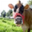

In [57]:
X_train[0]

In [58]:
'''''
Aquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'
Fish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'
Flowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'
Food containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'
Fruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'
Household electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'
Household furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'
Insects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'
Large carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'
Large man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'
Large natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'
Large omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'
Medium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'
Non-insect invertebrates: 'crab', 'lobster', 'snail', 'spider', 'worm'
People: 'baby', 'boy', 'girl', 'man', 'woman'
Reptiles: 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'
Small mammals: 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'
Trees: 'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree'
Vehicles 1: 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train'
Vehicles 2: 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'

'''''

"''\nAquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'\nFish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'\nFlowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'\nFood containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'\nFruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'\nHousehold electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'\nHousehold furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'\nInsects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'\nLarge carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'\nLarge man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'\nLarge natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'\nLarge omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'\nMedium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'\nNon-insect invertebrates: 'crab', 'lobster', 'snail

In [59]:
my_super = [
    'aquatic mammals',  # Superclass 0
    'fish',             # Superclass 1
    'flowers',          # Superclass 2
    'food containers',  # Superclass 3
    'fruit and vegetables',  # Superclass 4
    'household electrical devices',  # Superclass 5
    'household furniture',  # Superclass 6
    'insects',          # Superclass 7
    'large carnivores', # Superclass 8
    'large man-made outdoor things',  # Superclass 9
    'large natural outdoor scenes',   # Superclass 10
    'large omnivores and herbivores', # Superclass 11
    'medium-sized mammals',   # Superclass 12
    'non-insect invertebrates',  # Superclass 13
    'people',           # Superclass 14
    'reptiles',         # Superclass 15
    'small mammals',    # Superclass 16
    'trees',            # Superclass 17
    'vehicles 1',       # Superclass 18
    'vehicles 2'        # Superclass 19
]

print(my_super)

['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']


In [60]:
my_class = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',   # Superclass 0 : aquatic mammals
    'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',   # Superclass 1 : fish
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',   # Superclass 2 : flowers
    'bottles', 'bowls', 'cans', 'cups', 'plates',   # Superclass 3 : food containers
    'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',   # Superclass 4 : fruit and vegetables
    'clock', 'computer keyboard', 'lamp', 'telephone', 'television',   # Superclass 5 : household electrical devices
    'bed', 'chair', 'couch', 'table', 'wardrobe',   # Superclass 6 : household furniture
    'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',   # Superclass 7 : insects
    'bear', 'leopard', 'lion', 'tiger', 'wolf',   # Superclass 8 : large carnivores
    'bridge', 'castle', 'house', 'road', 'skyscraper',   # Superclass 9 : large man-made outdoor things
    'cloud', 'forest', 'mountain', 'plain', 'sea',   # Superclass 10 : large natural outdoor scenes
    'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',   # Superclass 11 : large omnivores and herbivores
    'fox', 'porcupine', 'possum', 'raccoon', 'skunk',   # Superclass 12 : medium-sized mammals
    'crab', 'lobster', 'snail', 'spider', 'worm',   # Superclass 13 : non-insect invertebrates
    'baby', 'boy', 'girl', 'man', 'woman',   # Superclass 14 : people
    'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',   # Superclass 15 : reptiles
    'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',   # Superclass 16 : small mammals
    'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree',   # Superclass 17 : trees
    'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',   # Superclass 18 : vehicles 1
    'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'   # Superclass 19 : vehicles 2
]


print(my_class)

['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn

array([[[ 79, 132, 197],
        [ 79, 132, 197],
        [ 80, 132, 197],
        ...,
        [ 79, 131, 196],
        [ 79, 131, 196],
        [ 79, 131, 196]],

       [[ 82, 136, 201],
        [ 83, 137, 201],
        [ 83, 137, 201],
        ...,
        [ 82, 136, 200],
        [ 82, 136, 200],
        [ 82, 136, 200]],

       [[ 84, 138, 199],
        [ 84, 138, 199],
        [ 85, 139, 200],
        ...,
        [ 84, 137, 199],
        [ 84, 137, 199],
        [ 83, 137, 199]],

       ...,

       [[182, 181, 181],
        [171, 167, 163],
        [218, 209, 201],
        ...,
        [158, 147, 141],
        [189, 175, 168],
        [211, 196, 189]],

       [[197, 186, 178],
        [179, 168, 160],
        [222, 209, 201],
        ...,
        [201, 189, 184],
        [203, 189, 183],
        [208, 194, 188]],

       [[202, 183, 171],
        [199, 182, 171],
        [221, 205, 196],
        ...,
        [206, 193, 190],
        [206, 193, 189],
        [204, 190, 186]]], dtype=uint8)
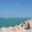

In [61]:
X_train[54]

In [64]:
X_train = X_train/255
X_test = X_test/255

In [65]:
X_train[54]

array([[[0.30980392, 0.51764706, 0.77254902],
        [0.30980392, 0.51764706, 0.77254902],
        [0.31372549, 0.51764706, 0.77254902],
        ...,
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745]],

       [[0.32156863, 0.53333333, 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        ...,
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373]],

       [[0.32941176, 0.54117647, 0.78039216],
        [0.32941176, 0.54117647, 0.78039216],
        [0.33333333, 0.54509804, 0.78431373],
        ...,
        [0.32941176, 0.5372549 , 0.78039216],
        [0.32941176, 0.5372549 , 0.78039216],
        [0.3254902 , 0.5372549 , 0.78039216]],

       ...,

       [[0.71372549, 0.70980392, 0.70980392],
        [0.67058824, 0.65490196, 0.63921569],
        [0.85490196, 0

#**Artifical Neural Network**

In [66]:
CIFAR = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(100, activation = 'sigmoid')

])

CIFAR.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [67]:
CIFAR.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 264s 168ms/step - loss: 4.1020 - accuracy: 0.0844
Epoch 2/10
1563/1563 [==============================] - 365s 234ms/step - loss: 3.7183 - accuracy: 0.1420
Epoch 3/10
1563/1563 [==============================] - 298s 191ms/step - loss: 3.5604 - accuracy: 0.1727
Epoch 4/10
1563/1563 [==============================] - 255s 163ms/step - loss: 3.4487 - accuracy: 0.1925
Epoch 5/10
1563/1563 [==============================] - 315s 201ms/step - loss: 3.3578 - accuracy: 0.2109
Epoch 6/10
1563/1563 [==============================] - 293s 188ms/step - loss: 3.2810 - accuracy: 0.2258
Epoch 7/10
1563/1563 [==============================] - 256s 164ms/step - loss: 3.2070 - accuracy: 0.2369
Epoch 8/10
1563/1563 [==============================] - 253s 162ms/step - loss: 3.1392 - accuracy: 0.2511
Epoch 9/10
1563/1563 [==============================] - 254s 163ms/step - loss: 3.0748 - accuracy: 0.2637
Epoch 10/10
1563/1563 [=======================

##Training accuracy = 27.45%

In [68]:
CIFAR.evaluate(X_test, y_test)

313/313 [==============================] - 15s 47ms/step - loss: 3.2929 - accuracy: 0.2241


[3.2928874492645264, 0.2240999937057495]

##Testing accuracy = 22.59%

In [69]:
y_predA = CIFAR.predict(X_test)

313/313 [==============================] - 15s 47ms/step


In [70]:
y_predA[0]

array([3.8323542e-03, 2.0007980e-01, 7.2605544e-01, 8.1756085e-01,
       7.4798161e-01, 8.4599650e-01, 9.4090059e-02, 3.9059907e-01,
       9.7084647e-01, 6.0941064e-01, 5.2452689e-01, 8.7354732e-01,
       9.7847337e-01, 7.2886330e-01, 1.6785262e-02, 1.8260817e-01,
       5.7426959e-01, 7.7514654e-01, 2.1952538e-01, 4.6873009e-01,
       2.3983167e-01, 4.4396523e-01, 6.7481458e-01, 7.9167819e-01,
       3.5799402e-01, 6.7101806e-01, 3.6191550e-01, 3.7833625e-01,
       6.1055964e-01, 3.3681333e-01, 9.7287714e-01, 6.5861362e-01,
       8.7689173e-01, 4.2838278e-01, 3.7753808e-01, 7.5392616e-01,
       1.3869509e-01, 7.1252072e-01, 4.8871067e-01, 9.0220100e-01,
       8.6063862e-01, 3.0796024e-01, 5.9631526e-01, 1.2378577e-01,
       5.3786027e-01, 2.4504706e-01, 9.2104632e-01, 1.5630789e-01,
       8.3548588e-01, 9.3439680e-01, 2.5505123e-01, 5.0488047e-02,
       2.2036912e-02, 2.4070575e-04, 3.0983287e-01, 7.8995186e-01,
       8.5730529e-01, 6.8559855e-02, 4.3384197e-01, 7.0400184e

In [71]:
y_predA_new = [np.argmax(i) for i in y_predA]

In [72]:
y_predA_new[:10]

[76, 80, 15, 10, 71, 6, 63, 7, 23, 10]

In [73]:
y_test[:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0])

##Confusion Matrix

In [74]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_predA_new)
CM

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[32,  2,  1, ...,  0,  0,  0],
       [ 0, 39,  0, ...,  1,  2,  0],
       [ 1,  0, 14, ...,  2, 11,  1],
       ...,
       [ 0,  3,  4, ..., 15,  3,  0],
       [ 0,  0,  3, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  1,  1,  3]], dtype=int32)>

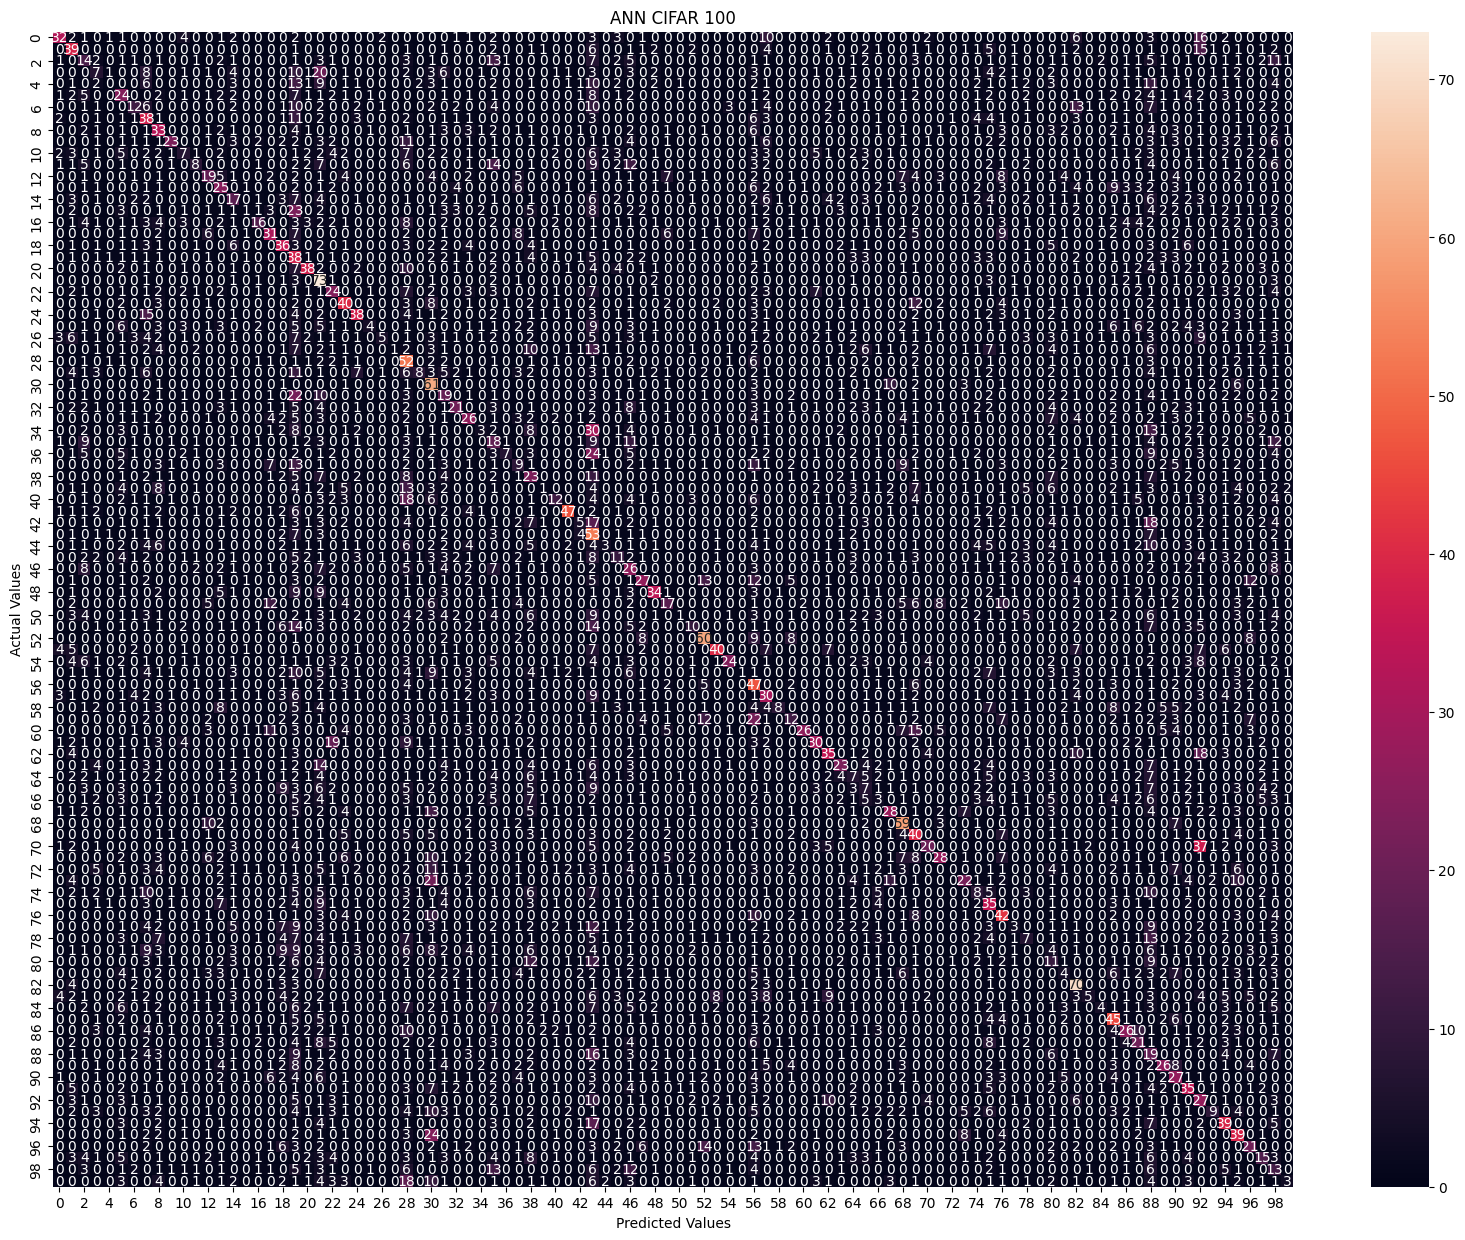

In [75]:
plt.figure(figsize = (20,15))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN CIFAR 100')
plt.show()

#**Convolutional Neural Network**

In [78]:
CNN = models.Sequential([

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(100, activation = 'sigmoid')

])

CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [79]:
CNN.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 158s 101ms/step - loss: 3.7390 - accuracy: 0.1345
Epoch 2/20
1563/1563 [==============================] - 157s 100ms/step - loss: 3.0382 - accuracy: 0.2582
Epoch 3/20
1563/1563 [==============================] - 152s 97ms/step - loss: 2.7348 - accuracy: 0.3166
Epoch 4/20
1563/1563 [==============================] - 158s 101ms/step - loss: 2.5395 - accuracy: 0.3564
Epoch 5/20
1563/1563 [==============================] - 152s 97ms/step - loss: 2.4103 - accuracy: 0.3852
Epoch 6/20
1563/1563 [==============================] - 151s 97ms/step - loss: 2.2981 - accuracy: 0.4076
Epoch 7/20
1563/1563 [==============================] - 153s 98ms/step - loss: 2.2076 - accuracy: 0.4259
Epoch 8/20
1563/1563 [==============================] - 152s 98ms/step - loss: 2.1282 - accuracy: 0.4437
Epoch 9/20
1563/1563 [==============================] - 150s 96ms/step - loss: 2.0596 - accuracy: 0.4584
Epoch 10/20
1563/1563 [=============================

##Training Accuracy = 59.18%

In [80]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 9s 30ms/step - loss: 3.0675 - accuracy: 0.3452


[3.067546844482422, 0.3452000021934509]

##Testing Accuracy = 34.52%

In [81]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 8s 26ms/step


In [82]:
y_pred[0:5]

array([[7.55100928e-07, 2.89886002e-03, 2.38200068e-01, 5.37776798e-02,
        8.07943288e-03, 1.94030930e-03, 1.27613923e-04, 1.69403141e-03,
        2.26384290e-02, 3.03554139e-03, 4.07363375e-04, 8.53558183e-02,
        2.99102277e-01, 3.40976543e-03, 2.96959653e-04, 1.02698233e-03,
        1.18817436e-03, 9.97810997e-03, 1.92674529e-02, 1.37286086e-03,
        1.29898603e-04, 9.77838039e-02, 5.34930080e-03, 7.04364255e-02,
        2.22720187e-02, 5.59361046e-03, 3.51934228e-03, 7.35774115e-02,
        6.26391411e-05, 7.21064657e-02, 9.25374568e-01, 1.92947071e-02,
        2.28255074e-02, 1.18840067e-03, 1.12413280e-02, 3.24482173e-01,
        4.98639478e-04, 8.03848729e-03, 4.39523011e-02, 2.01902866e-01,
        1.42319277e-01, 5.33172721e-03, 3.94133909e-04, 2.28932142e-04,
        1.33099139e-01, 2.74657439e-02, 1.73859388e-01, 3.52177303e-04,
        1.97350280e-03, 4.39094961e-01, 1.06778080e-02, 2.04899744e-03,
        4.33905865e-04, 1.49361315e-10, 2.06806068e-03, 6.723190

In [83]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [84]:
y_pred_new[0:5]

[30, 97, 72, 51, 71]

In [85]:
y_test[0:5]

array([49, 33, 72, 51, 71])

In [86]:
CM_CNN = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM_CNN

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[65,  1,  0, ...,  0,  0,  0],
       [ 1, 39,  0, ...,  0,  0,  0],
       [ 3,  1, 27, ...,  1,  5,  0],
       ...,
       [ 0,  1,  0, ..., 30,  1,  0],
       [ 0,  1, 10, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  0,  0, 27]], dtype=int32)>

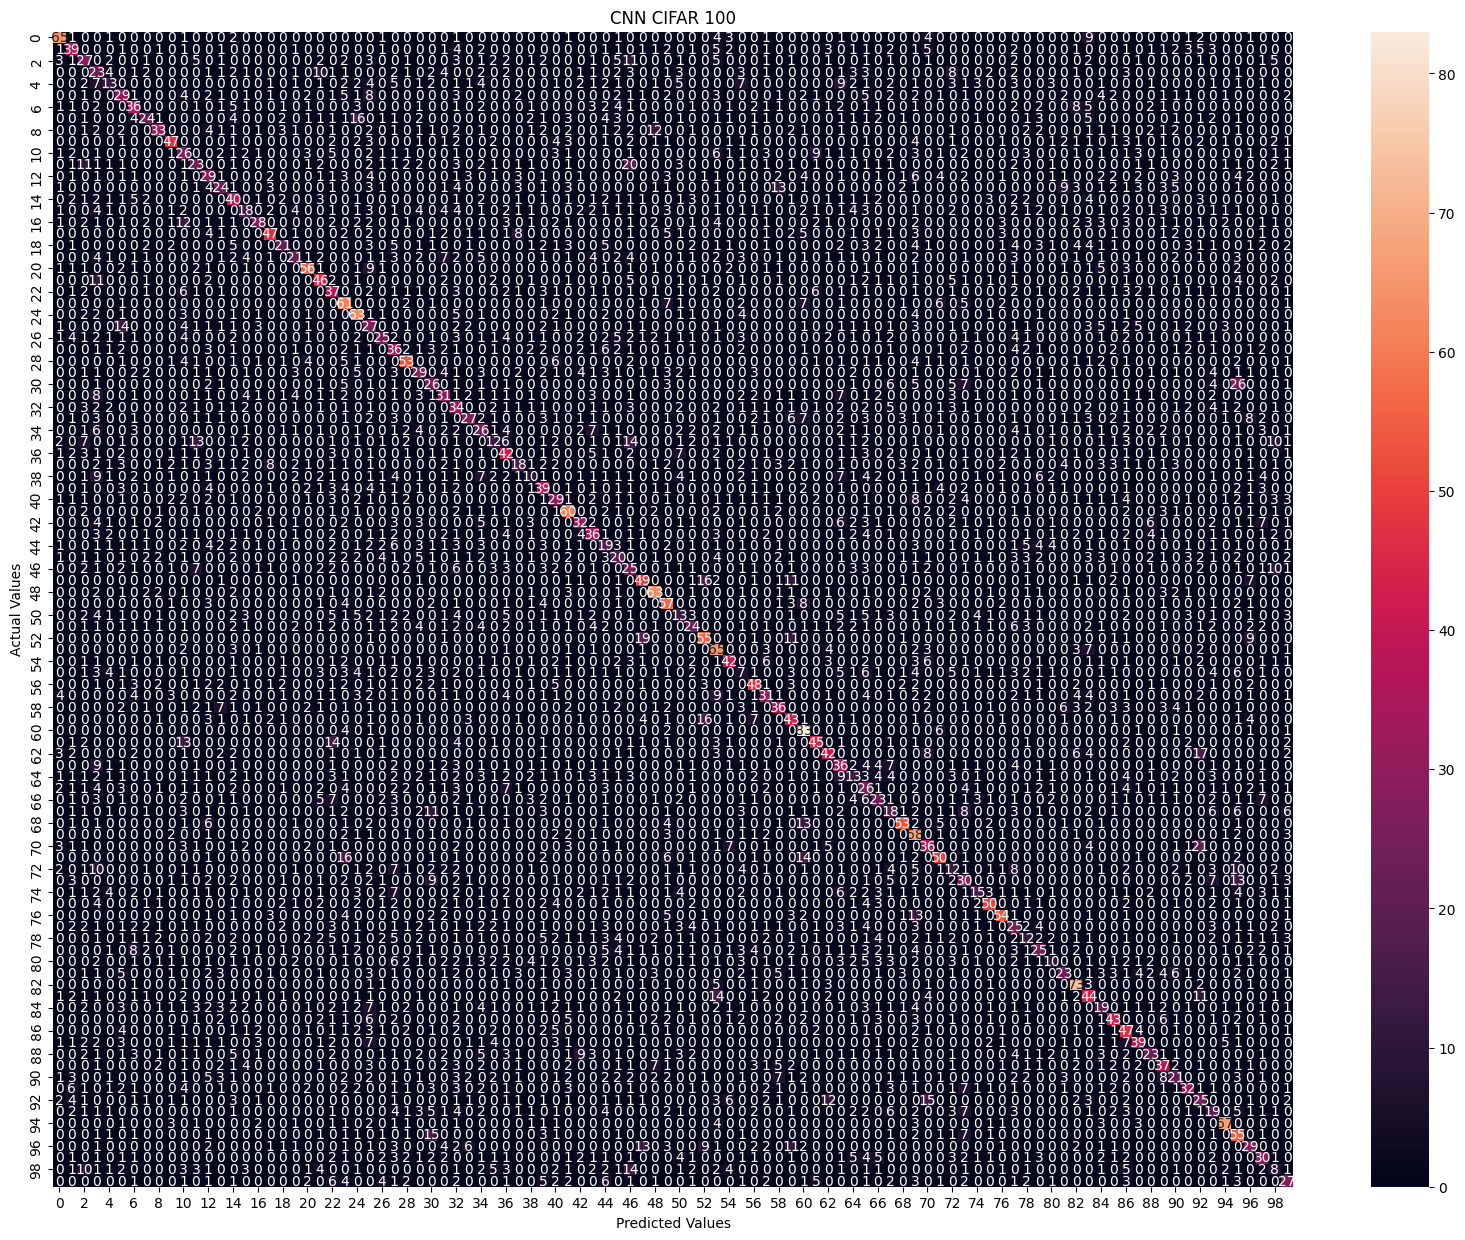

In [87]:
plt.figure(figsize = (20, 15))
sns.heatmap(CM_CNN, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('CNN CIFAR 100')
plt.show()

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       100
           1       0.41      0.39      0.40       100
           2       0.24      0.27      0.26       100
           3       0.14      0.23      0.17       100
           4       0.25      0.13      0.17       100
           5       0.26      0.29      0.28       100
           6       0.37      0.36      0.36       100
           7       0.41      0.24      0.30       100
           8       0.55      0.33      0.41       100
           9       0.61      0.47      0.53       100
          10       0.20      0.26      0.22       100
          11       0.28      0.23      0.25       100
          12       0.26      0.29      0.27       100
          13       0.33      0.24      0.28       100
          14       0.31      0.40      0.35       100
          15       0.27      0.18      0.22       100
          16       0.52      0.28      0.36       100
          17       0.61    

In [90]:
CNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              